# Ex05 Clustering

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline

## 1. Preprocessing

In [5]:
data = pd.read_csv('../data/regression.csv')
data = data.drop(columns='pageviews')

In [6]:
data.head()

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667


## 2. KMeans

In [7]:
X = data[["num_commits", "AVG(diff)"]]

In [22]:
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=21)

In [20]:
kmeans.labels_

array([0, 0, 1, 0, 4, 2, 0, 2, 0, 3, 3, 4, 2, 0, 4, 4, 3, 4, 3, 0, 1, 0,
       4, 1, 2, 1, 0, 3, 1], dtype=int32)

In [21]:
data['cluster'] = kmeans.labels_

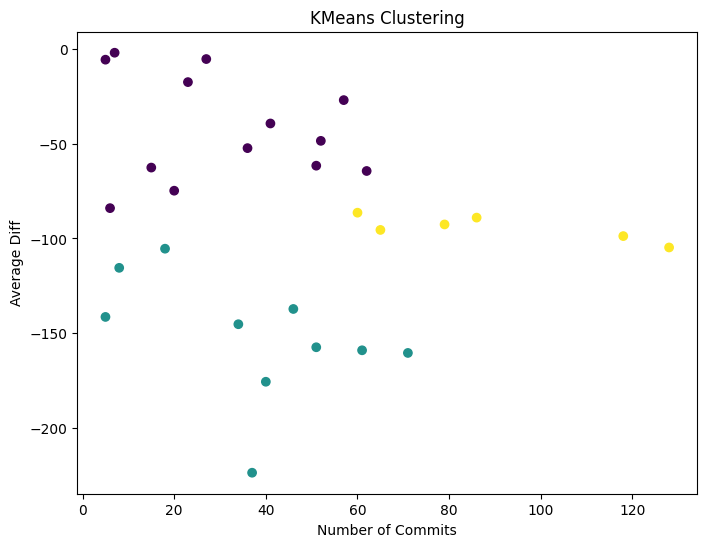

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(data["num_commits"], data["AVG(diff)"], c=data["cluster"], cmap='viridis')
plt.xlabel('Number of Commits')
plt.ylabel('Average Diff')
plt.title('KMeans Clustering')
plt.show()

In [24]:
silhouette_score(X, kmeans.labels_)

0.4454402135233297

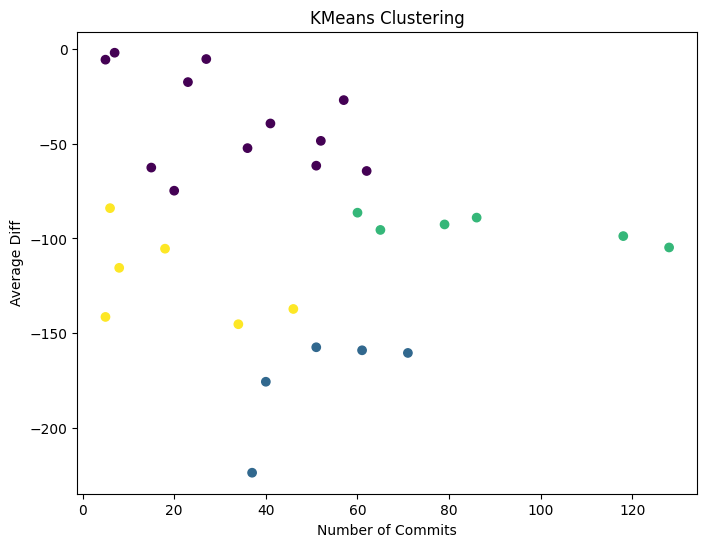

In [25]:
kmeans = KMeans(n_clusters=4, random_state=21)
kmeans.fit(X)
plt.figure(figsize=(8, 6))
plt.scatter(data["num_commits"], data["AVG(diff)"], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Number of Commits')
plt.ylabel('Average Diff')
plt.title('KMeans Clustering')
plt.show()

In [26]:
silhouette_score(X, kmeans.labels_)

0.41503879936268956

## 3. DBSCAN

In [30]:
dbscan = DBSCAN(eps=20, min_samples=2)
dbscan.fit(X)

DBSCAN(eps=20, min_samples=2)

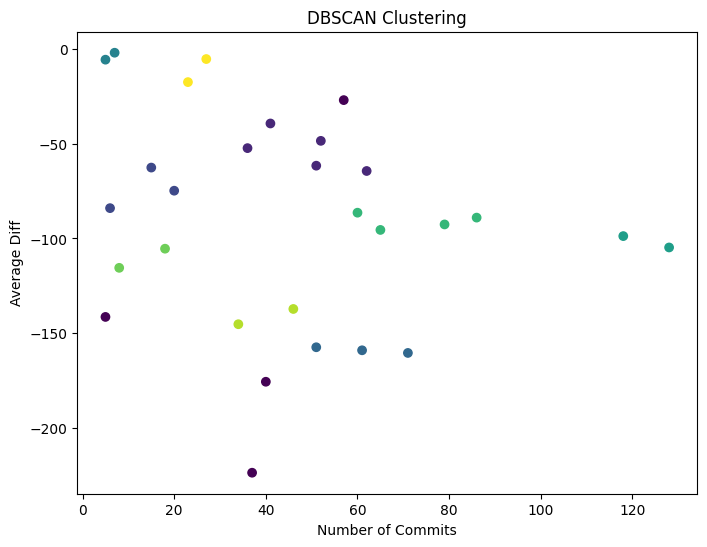

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(data["num_commits"], data["AVG(diff)"], c=dbscan.labels_, cmap='viridis')
plt.xlabel('Number of Commits')
plt.ylabel('Average Diff')
plt.title('DBSCAN Clustering')
plt.show()

In [35]:
silhouette_score(X, dbscan.labels_)

0.38339641455696616

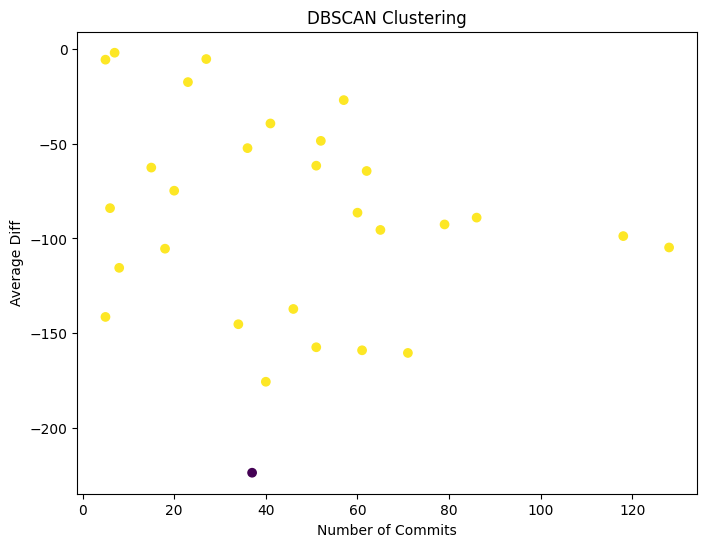

In [33]:
dbscan_40 = DBSCAN(eps=40, min_samples=2)
dbscan_40.fit(X)
plt.figure(figsize=(8, 6))
plt.scatter(data["num_commits"], data["AVG(diff)"], c=dbscan_40.labels_, cmap='viridis')
plt.xlabel('Number of Commits')
plt.ylabel('Average Diff')
plt.title('DBSCAN Clustering')
plt.show()

In [36]:
silhouette_score(X, dbscan_40.labels_)

0.3659855186711519

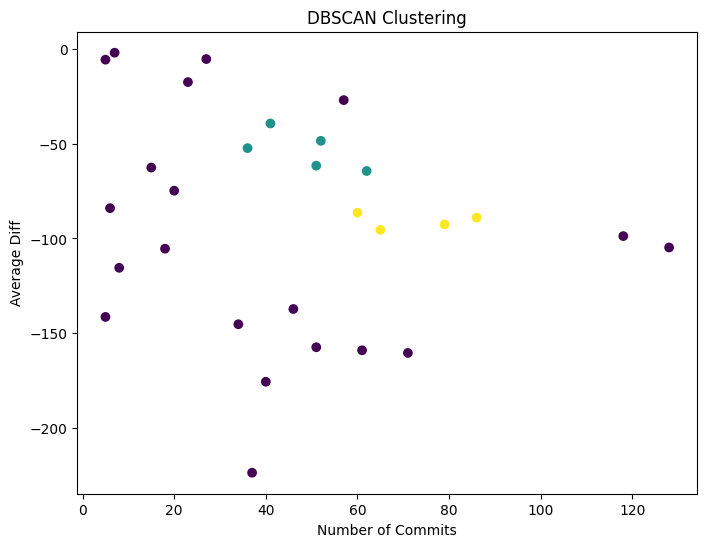

In [34]:
dbscan_4 = DBSCAN(eps=20, min_samples=4)
dbscan_4.fit(X)
plt.figure(figsize=(8, 6))
plt.scatter(data["num_commits"], data["AVG(diff)"], c=dbscan_4.labels_, cmap='viridis')
plt.xlabel('Number of Commits')
plt.ylabel('Average Diff')
plt.title('DBSCAN Clustering')
plt.show()

In [37]:
silhouette_score(X, dbscan_4.labels_)

-0.027327812753917446

## 4.Hierarchical (AgglomerativeClustering)

In [39]:
agg_clust = AgglomerativeClustering(n_clusters=5)
agg_clust.fit_predict(X)

array([2, 3, 0, 2, 4, 1, 1, 1, 1, 3, 0, 4, 1, 2, 4, 2, 0, 2, 3, 3, 0, 2,
       4, 0, 1, 0, 3, 3, 0])

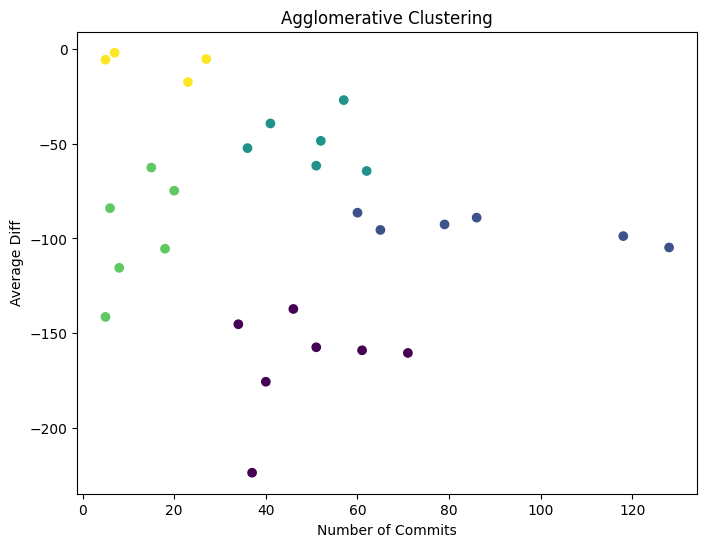

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(data["num_commits"], data["AVG(diff)"], c=agg_clust.fit_predict(X), cmap='viridis')
plt.xlabel('Number of Commits')
plt.ylabel('Average Diff')
plt.title('Agglomerative Clustering')
plt.show()

In [43]:
silhouette_score(X, agg_clust.fit_predict(X))

0.46383015199381467

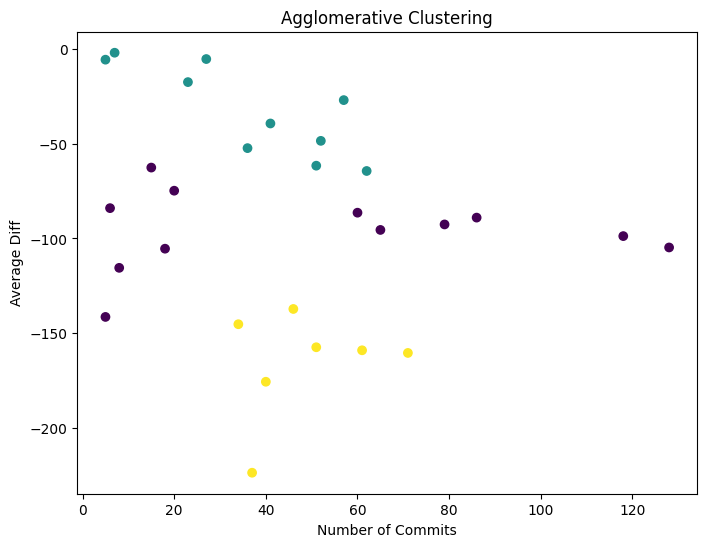

In [45]:
agg_clust_3 = AgglomerativeClustering(n_clusters=3)
plt.figure(figsize=(8, 6))
plt.scatter(data["num_commits"], data["AVG(diff)"], c=agg_clust_3.fit_predict(X), cmap='viridis')
plt.xlabel('Number of Commits')
plt.ylabel('Average Diff')
plt.title('Agglomerative Clustering')
plt.show()

In [46]:
silhouette_score(X, agg_clust_3.fit_predict(X))

0.3390493703444805

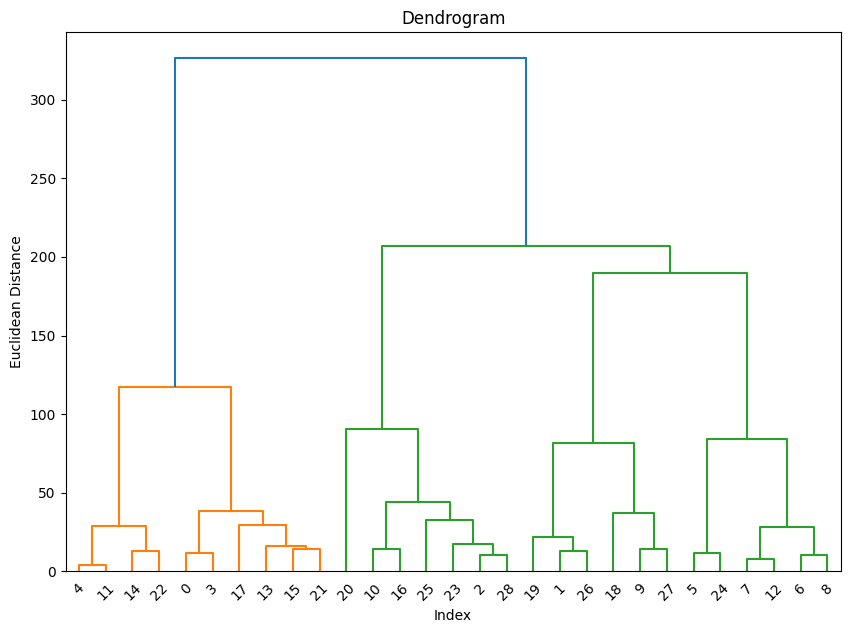

In [47]:
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.show()

## 5. Function

In [64]:
def optimize_clustering_param(clustering_model_class, params, param_name, param_range):
    silhouette_scores = []
    best_param_value = None
    best_score = -1
    for value in param_range:
        params[param_name] = value
        model = clustering_model_class(**params)
        clusters = model.fit_predict(X)
        
        score = silhouette_score(X, clusters)
        silhouette_scores.append(score)
        
        if score > best_score:
            best_score = score
            best_param_value = value
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # silhouette score vs parameter values
    axs[0].plot(param_range, silhouette_scores, marker='o', linestyle='-', color='b')
    axs[0].set_xlabel(param_name)
    axs[0].set_ylabel('Silhouette Score')
    axs[0].set_title(f'Silhouette Score vs {param_name}')
    
    # scatter plot
    params[param_name] = best_param_value
    model = clustering_model_class(**params)
    best_clusters = model.fit_predict(X)
    
    axs[1].scatter(data["num_commits"], data["AVG(diff)"], c=best_clusters, cmap='viridis')
    axs[1].set_title(f'Clustering with {param_name}={best_param_value}')
    
    plt.tight_layout()
    plt.show()

    return best_param_value, best_score

### best number of clusters for KMeans (answer = 8)

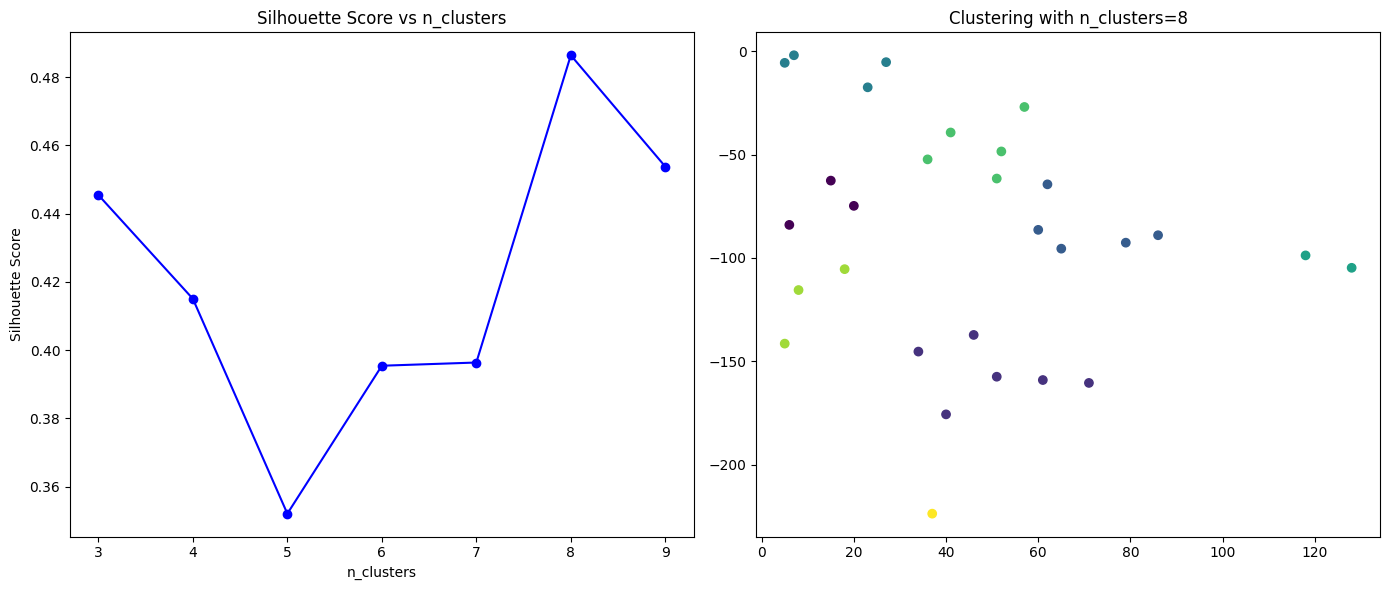

(8, 0.48638087320227846)

In [65]:
k_params = {'random_state':21}
optimize_clustering_param(KMeans, k_params, 'n_clusters', range(3,10))

### best min_samples for DBSCAN (answer = 1)

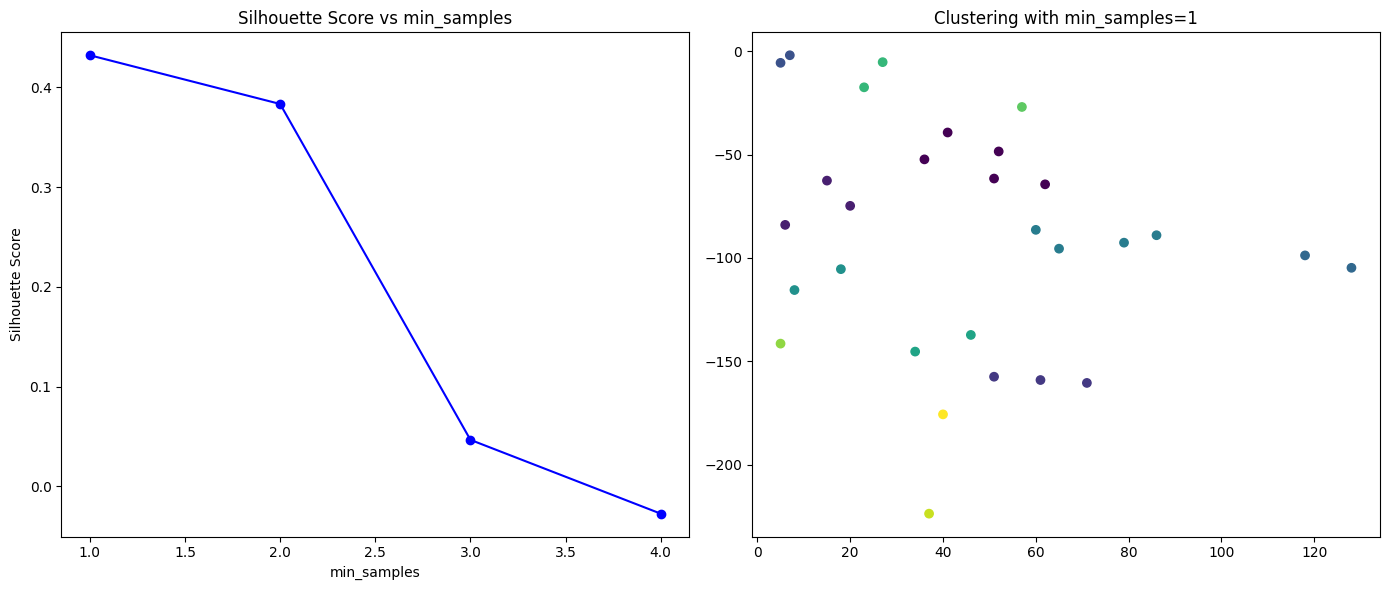

(1, 0.4322483665424573)

In [ ]:
optimize_clustering_param(DBSCAN, {'eps':20}, 'min_samples', range(1,5))

### best eps for DBSCAN (answer = 22)

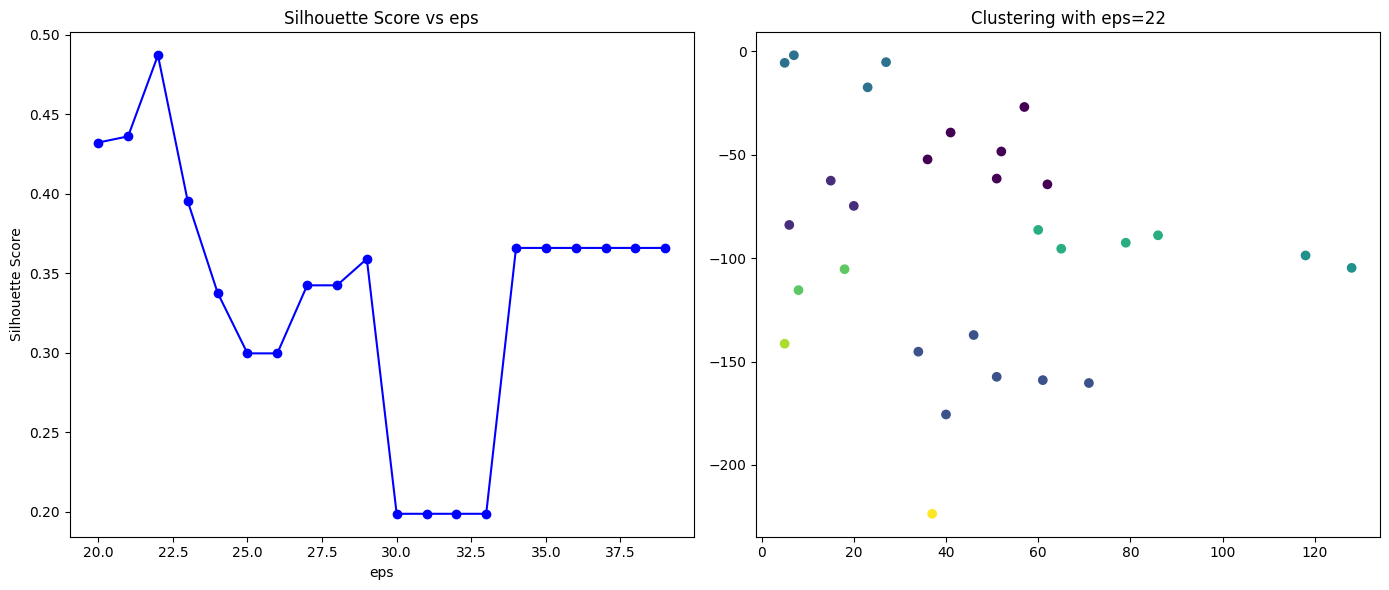

(22, 0.48713041554757475)

In [69]:
optimize_clustering_param(DBSCAN, {'min_samples':1}, 'eps', range(20,40))

### best n_clusters for AgglomerativeClustering (answer = 8)

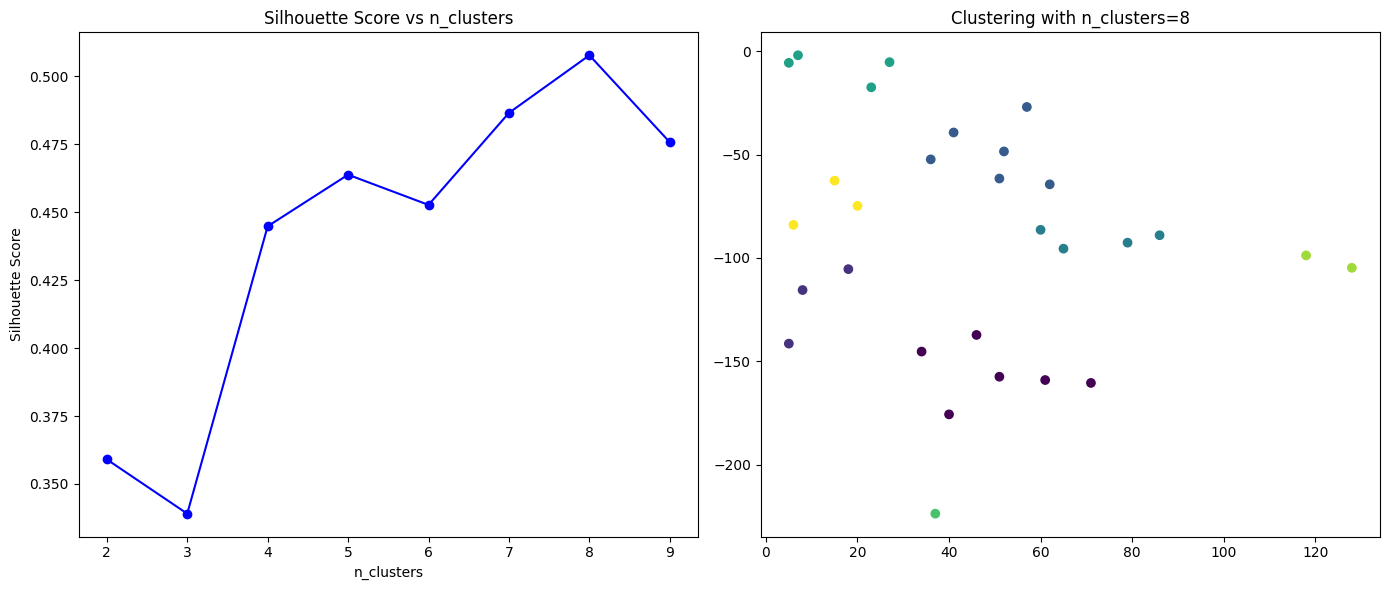

(8, 0.50779855565622)

In [72]:
optimize_clustering_param(AgglomerativeClustering, {}, 'n_clusters', range(2,10))